### PCA -> WHat are they - What PCA is a transformation of you data to show which features explains the most variance in you data. PCA tries to get rid of the components(Variables) that does not explain too much of the variance in the data

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [6]:
cancer = pd.DataFrame(data["data"], columns=data["feature_names"])

In [7]:
cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Why use PCA ? It is pretty difficult to visualize high dementional Data so what we can do is use PCA to et the first 2 principal components. And visualize in a  new 2d Space. 

#### We willl need to scale the data to make sure the data is not considering any outyers. So we scale to make sure out data only has a single unit variance

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scalar = StandardScaler()

In [10]:
scalar.fit(cancer)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_Data = scalar.transform(cancer)

In [13]:
scaled_Data_Frame = pd.DataFrame(scaled_Data, columns=cancer.columns)

#### Now that our data is scaled to a single unit variance lets use PCA to get 2 principal components to analyze

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)

In [20]:
pca.fit(scaled_Data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
x_pca = pca.transform(scaled_Data)

In [23]:
x_pca.shape

(569, 2)

In [24]:
scaled_Data.shape

(569, 30)

### Lets take a look at the 2 componented in scatter plot. we can see that th PCA splits the data into almost 2 perfect components. this is the power of PCA. We take all 30 of the original variables and convert them to 2 principal components. We can see a clear separation between Benign and Melignant tumors. We are keeping alot of the information as well as explaining alot of the variance. The components on the other hand does not relate  1t 1 to variables in the original data, but is a represnetaion of a combination of features. Componentes are stores ads an atrribute of the pCA object

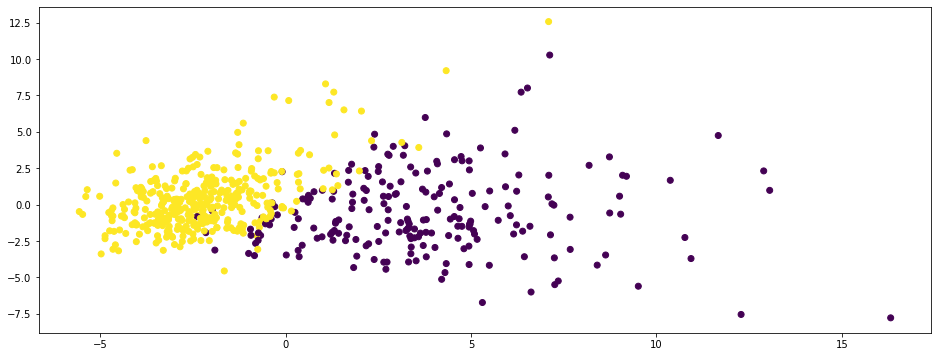

In [29]:
plt.figure(figsize=(16,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = data["target"])

###  Each row relate to the Principal component and each col relate back to the original features. Lets visually look at this using a heatmap

In [30]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [31]:
pca_comp_frame = pd.DataFrame(pca.components_, columns=cancer.columns)

In [32]:
pca_comp_frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


## Data frame PC 1 and PC2 and the relationship to the 30 features. The heat map shows relationship of the correaltaion of various features and the ralationshp to the PC them selves. If confused think of it this way. The PCA will take into consideration, not the variables, the the relationshop between those values.

In [3]:
plt.figure(figsize=(16,6))
sns.heatmap(pca_comp_frame, cmap="plasma")

NameError: name 'plt' is not defined

### Lets try a logistic regression on the reshaped PCA instead of the original 30 feature Data

In [53]:
frr = pd.DataFrame(x_pca, columns=["pc1", "pc2"])

In [54]:
frr

,pc1,pc2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
log_reg = LogisticRegression()

In [43]:
tar = [0,1]

In [45]:
pca_comp_frame["target"] = tar

In [55]:
X = frr
y = data["target"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [57]:
log_reg.fit(X_train,y_train)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
prediction = log_reg.predict(X_test)

In [60]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        66
           1       0.97      0.95      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [61]:
print(confusion_matrix(y_test,prediction))

[[ 63   3]
 [  5 100]]
